<a href="https://colab.research.google.com/github/jordanbuddenhagen/sales-predicitons/blob/main/Project_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1- Part 1 
  - Jordan Buddenhagen 


## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = ('/content/sales_predictions (1).xlsx') 

df_salesp = pd.read_excel(filename) 

df_salesp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


In [2]:
df_salesp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

1. How many rows and columns?

In [3]:

# df_salesp.nunique 

df_salesp.shape


(8523, 12)

2. What are the datatypes of each variable?

In [4]:


df_salesp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. Are there duplicates? 

In [5]:
df_salesp.duplicated().sum()

0

4. Identify missing values. 

In [6]:
df_salesp.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Item weight and Outlet Size have missing values 
- Item weight is missing 20.7% of its values and Outlet size is missing 39.4%. 
- Item weight should be taken out of the sales data.  Item weight should not affect the sales prediction.  Visibility, Item Type and Item retail prices are more important factors
- I also think Outlet sizes missing values can be identified as missing.  It will not effect any sort of data and maybe find the root of the problem why those stores are not getting reported for size of store.  It would be nice to have data to see if certain items are effected by the size.  

In [7]:
#df_salesp['Item_Weight'].isna().sum() / df_salesp['Item_Weight'].value_counts().sum()


In [8]:
#df_salesp['Outlet_Size'].nunique() 
#df_salesp['Outlet_Size'].isna().sum() / df_salesp['Outlet_Size'].value_counts().sum()

In [9]:
df_salesp = df_salesp.drop(columns=['Item_Weight', 'Outlet_Establishment_Year'])

In [10]:
df_salesp['Outlet_Size'].fillna('Missing', inplace=True) 

6. Confirming there is no missing values

In [11]:
df_salesp.isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

7. Find and fix inconsistent categories of data

In [12]:
#df_salesp['Item_Identifier', ].value_counts()
df_salesp.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [13]:
df_salesp['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df_salesp['Item_Fat_Content'] = df_salesp['Item_Fat_Content'].replace('LF' , 'Low Fat')
#df_salesp['Item_Fat_Content'].value_counts()

In [15]:
df_salesp['Item_Fat_Content'] = df_salesp['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_salesp['Item_Fat_Content'] = df_salesp['Item_Fat_Content'].replace('reg', 'Regular')
df_salesp['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
#df_salesp['Outlet_Location_Type'].value_counts()

- Went through and check each column.  The only column with inconsistances was Item Fat Content

8. Numerical Columns-- Obtain Min, Max and Mean of each 



In [17]:
df_salesp.describe().round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00
mean,0.07,140.99,2181.29
std,0.05,62.28,1706.50
min,0.00,31.29,33.29
25%,0.03,93.83,834.25
50%,0.05,143.01,1794.33
75%,0.09,185.64,3101.30
max,0.33,266.89,13086.96


## Exploratory Visuals

Text(0.5, 0, 'Outlet Sales ($)')

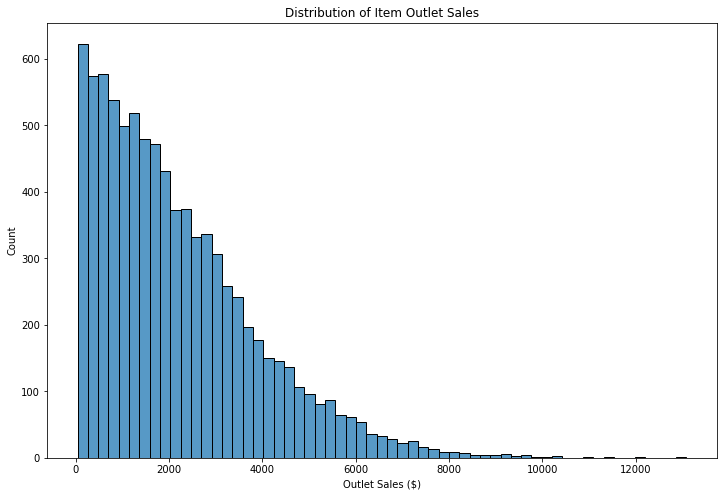

In [23]:
fig, ax= plt.subplots(figsize = (12,8))

g = sns.histplot( data=df_salesp, x= 'Item_Outlet_Sales'); 

g.set(title= 'Distribution of Item Outlet Sales') 

g.set_xlabel('Outlet Sales ($)')

### We can see that most outlet sales are within 0-$4,000. 

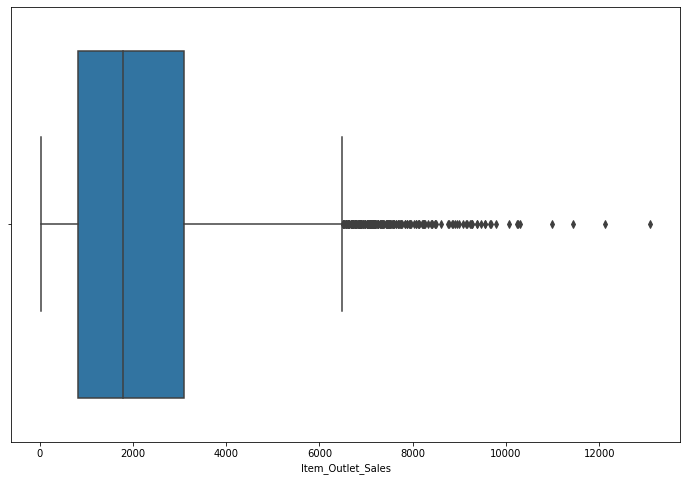

In [26]:
fig, ax= plt.subplots(figsize = (12,8))

b = sns.boxplot(data=df_salesp, x='Item_Outlet_Sales')

### We can see that there are quite a few outliers for the Outlet Sales.  We should dig deeper to see where most of them land. 

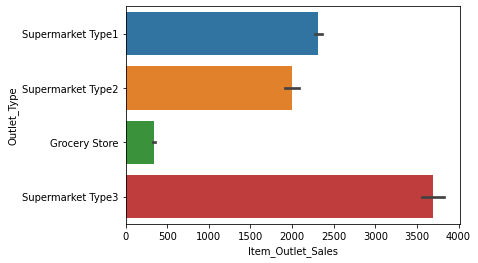

In [36]:
c = sns.barplot(data=df_salesp, y='Outlet_Type', x='Item_Outlet_Sales')

### We can see that Supermarket Type 3 has the most sales. 

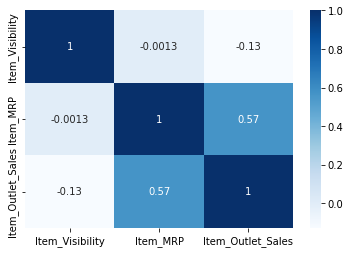

In [34]:
corr= df_salesp.corr()
sns.heatmap(corr, cmap = 'Blues', annot=True);

### Item Visiblity has no correlation, but Max Retail Price and Outlet Sales are somewhat correlated. 

## Explanatory Visuals